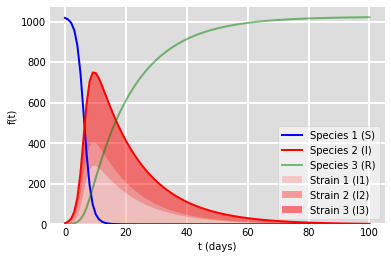

In [20]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Initial number of infected and recovered individuals, I0 and R0.
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
n = 2 ** 10
betas, gammas = [0.001, 0.0007, 0.0009] , [1./14, 1./12, 1./17] 
# Everyone else, S0, is susceptible to infection initially.
y02 = 1
y03 = 3
y04 = 2
y01 = n - y02 - y03 - y04
y05 = 0


# A grid of time points (in days)
t = np.linspace(0, 100, 100)

def F(i, N):
    d = 0
    X = N[i]
    for j in range(0, 5):
        Y = N[j]
        c1 = 0
        c3 = 0
        if j > 0 and j < 4: 
            c1 = betas[j - 1] * X * Y
            c3 = gammas[j - 1] * Y
        c2 = 0
        if i > 0 and i < 4: 
            c2 = betas[i - 1] * X * Y
        
        F = [
            [0, -c1, -c1, -c1, 0],
            [c2, -c3, 0, 0, 0],
            [c2, 0, -c3, 0, 0],
            [c2, 0, 0, -c3, 0],
            [0, c3, c3, c3, 0]
        ]
        d += F[i][j]
    return d
# The SIR model differential equations.
def deriv(y, t):
    N = y
    d1dt = F(0, N)
    d2dt = F(1, N)
    d3dt = F(2, N)
    d4dt = F(3, N)
    d5dt = F(4, N)
    # print(t, d3dt)
    return d1dt, d2dt, d3dt, d4dt, d5dt

# Initial conditions vector
y0 = y01, y02, y03, y04, y05
# Integrate the SIR equations over the time grid, t.

ret = odeint(deriv, y0, t)
S, I1, I2, I3, R,= ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S, 'b', lw=2, label='Species 1 (S)')
ax.plot(t, I1 + I2 + I3, 'r', lw=2, label='Species 2 (I)')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Species 3 (R)')

strain_values = [I1, I2, I3]
strain_labels = ['Strain 1 (I1)', 'Strain 2 (I2)', 'Strain 3 (I3)']
ax.stackplot(t, strain_values, labels=strain_labels, colors=['#ffa1a1', '#ff4a4a', '#ff0000'], alpha=0.5)
ax.set_xlabel('t (days)')
ax.set_ylabel('f(t)')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()